# Jonathan Halverson
# Thursday, April 13, 2017
# Part 15: Check of previous number of fights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')
from scipy.stats import binom, norm

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)

### Here we leave in draws and no contests

In [2]:
iofile = 'data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])
fights.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"


In [3]:
fights.shape

(4068, 11)

### Histogram of total number of fights of each fighter of all-time

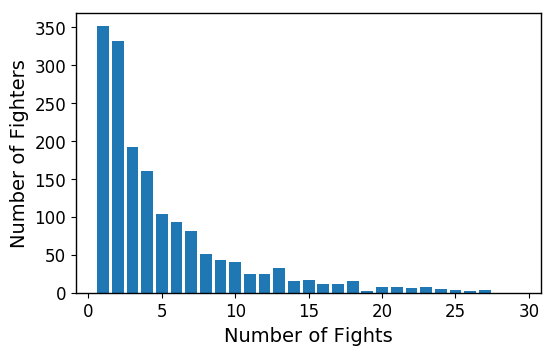

In [4]:
win_lose = fights.Winner.append(fights.Loser)
cts = win_lose.value_counts()
plt.hist(cts, bins=np.arange(0.5, 30.5, 1.0), rwidth=0.8)
plt.xlabel('Number of Fights')
plt.ylabel('Number of Fighters')

In [5]:
0.5 * cts.sum()

4068.0

In [28]:
np.percentile(cts.values, 50)

3.0

The above shows that 50 percent of the fighters have 3 fights or less. Note that these are final values. The numbers are much less as one walks through time.

(0, 1)

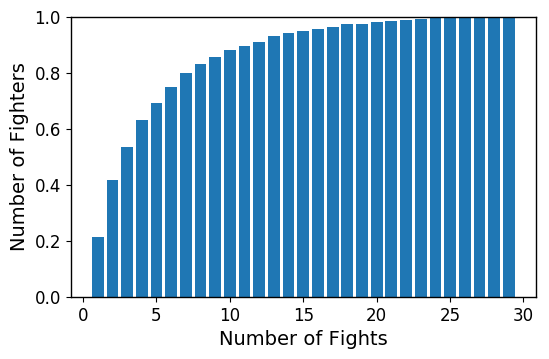

In [7]:
plt.hist(cts, bins=np.arange(0.5, 30.5, 1.0), rwidth=0.8, cumulative=True, normed=True)
plt.xlabel('Number of Fights')
plt.ylabel('Number of Fighters')
plt.ylim(0, 1)

In [8]:
# below we use the index to find previous fights since in early days they fought
# multiple times per day so date cannot be used

NumPreviousFights = []
NumPreviousFights_L = []
for index, row in fights.iterrows():
     d = row['Date']
     
     winner = row['Winner']
     a = fights[((fights.Winner == winner) | (fights.Loser == winner)) & (fights.index > index)]
     NumPreviousFights.append(a.shape[0])
     
     loser = row['Loser']
     b = fights[((fights.Winner == loser) | (fights.Loser == loser)) & (fights.index > index)]
     NumPreviousFights_L.append(b.shape[0])
fights['NumPreviousFights'] = NumPreviousFights
fights['NumPreviousFights_L'] = NumPreviousFights_L

In [9]:
fights

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,NumPreviousFights,NumPreviousFights_L
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",4,5
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",21,9
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",7,20
3,Glover Teixeira,def.,Jared Cannonier,Light Heavyweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",11,3
4,Dustin Poirier,def.,Jim Miller,Lightweight,M-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",16,25
5,Belal Muhammad,def.,Randy Brown,Welterweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",3,4
6,Wilson Reis,def.,Ulka Sasaki,Flyweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",7,4
7,Islam Makhachev,def.,Nik Lentz,Lightweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",3,17
8,Rick Glenn,def.,Phillipe Nover,Featherweight,S-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",1,6
9,Ryan LaFlare,def.,Roan Carneiro,Welterweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",6,8


In [10]:
f05 = fights[fights.Date > pd.to_datetime('2005-01-01')]

[(0, 30.85054080629302), (1, 51.45034414945919), (2, 64.03638151425763), (3, 73.05801376597837), (4, 79.52310717797444), (5, 84.56243854473944), (6, 88.10226155358899), (7, 91.05211406096362), (8, 93.19075712881023), (9, 94.93608652900689), (10, 96.55850540806293), (11, 97.66470009832841), (12, 98.35299901671583), (13, 98.82005899705015), (14, 99.13962635201574), (15, 99.33628318584071), (16, 99.60668633235005), (17, 99.68043264503441), (18, 99.77876106194691), (19, 99.82792527040314), (20, 99.92625368731564), (21, 99.97541789577188), (22, 100.0), (23, 100.0), (24, 100.0), (25, 100.0)] 

[(0, 27.983425414364643), (1, 48.83977900552486), (2, 61.54696132596685), (3, 70.91160220994475), (4, 77.70718232044199), (5, 83.12154696132596), (6, 86.9060773480663), (7, 90.19337016574586), (8, 92.51381215469613), (9, 94.39226519337016), (10, 96.13259668508287), (11, 97.37569060773481), (12, 98.14917127071823), (13, 98.67403314917127), (14, 99.03314917127072), (15, 99.25414364640883), (16, 99.558011

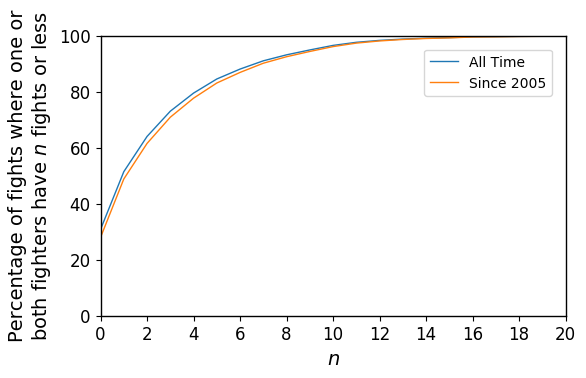

In [30]:
min_num_fights = []
min_num_fights05 = []
total_fights = float(fights.shape[0])
total_fights05 = float(f05.shape[0])
for i in range(25+1):
     min_num_fights.append((i, 100.0 * fights[(fights.NumPreviousFights <= i) | (fights.NumPreviousFights_L <= i)].shape[0] / total_fights))
     min_num_fights05.append((i, 100.0 * f05[(f05.NumPreviousFights <= i) | (f05.NumPreviousFights_L <= i)].shape[0] / total_fights05))
mins, ct = zip(*min_num_fights)
mins05, ct05 = zip(*min_num_fights05)
plt.plot(mins, ct, label='All Time')
plt.plot(mins05, ct05, label='Since 2005')
plt.xlabel('$n$')
plt.ylabel('Percentage of fights where one or\nboth fighters have $n$ fights or less')
plt.xlim(0, 15)
plt.ylim(0, 100)
plt.axes().set_xticks(range(0, 21, 2))
#plt.axes().grid(True)
print min_num_fights,'\n\n', min_num_fights05
plt.legend()
plt.savefig('report/prediction/lack_of_ufc_fights.pdf', bbox_inches='tight')